In [1]:
import os

os.chdir(r"C:\Users\Admin\Desktop\Prakash\Multiclass Fish Image Classification")
print(" Current working directory:", os.getcwd())
print(" Contents:", os.listdir())


 Current working directory: C:\Users\Admin\Desktop\Prakash\Multiclass Fish Image Classification
 Contents: ['.ipynb_checkpoints', 'data', 'models', 'README.md', 'reports', 'requirements.txt', 'src', 'streamlit_app.py', 'Untitled.ipynb', 'Untitled1.ipynb']


In [2]:
import os, shutil

train_dir = os.path.join("data", "train")
val_dir   = os.path.join("data", "val")
target_dir = os.path.join("data", "fish")

os.makedirs(target_dir, exist_ok=True)

def merge_folders(src, dst):
    for class_name in os.listdir(src):
        src_class = os.path.join(src, class_name)
        dst_class = os.path.join(dst, class_name)
        os.makedirs(dst_class, exist_ok=True)
        for file in os.listdir(src_class):
            shutil.copy2(os.path.join(src_class, file), dst_class)

merge_folders(train_dir, target_dir)
merge_folders(val_dir, target_dir)

print(" train + val merged into:", target_dir)


 train + val merged into: data\fish


In [3]:
import glob

for c in sorted(os.listdir("data/fish")):
    count = len(glob.glob(os.path.join("data/fish", c, "*")))
    print(f"{c}: {count} images")


animal fish: 1283 images
animal fish bass: 40 images
fish sea_food black_sea_sprat: 674 images
fish sea_food gilt_head_bream: 660 images
fish sea_food hourse_mackerel: 670 images
fish sea_food red_mullet: 669 images
fish sea_food red_sea_bream: 684 images
fish sea_food sea_bass: 635 images
fish sea_food shrimp: 676 images
fish sea_food striped_red_mullet: 648 images
fish sea_food trout: 678 images


In [4]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [6]:
!python -m src.train --data_dir data/fish \
    --models mobilenetv2 --img_size 224 224 --batch_size 32 \
    --epochs_stage1 2 --epochs_stage2 2 --output_dir .


Found 5858 images belonging to 11 classes.
Found 1459 images belonging to 11 classes.

Training mobilenetv2 ...
Epoch 1/2

  1/184 ==================== 18:14 6s/step - accuracy: 0.1562 - loss: 2.4415
  2/184 ==================== 2:43 898ms/step - accuracy: 0.1797 - loss: 2.4458
  3/184 ==================== 2:47 926ms/step - accuracy: 0.1892 - loss: 2.4516
  4/184 ==================== 2:46 926ms/step - accuracy: 0.2025 - loss: 2.4300
  5/184 ==================== 2:45 927ms/step - accuracy: 0.2220 - loss: 2.3817
  6/184 ==================== 2:44 926ms/step - accuracy: 0.2397 - loss: 2.3302
  7/184 ==================== 2:44 928ms/step - accuracy: 0.2590 - loss: 2.2777
  8/184 ==================== 2:43 927ms/step - accuracy: 0.2779 - loss: 2.2286
  9/184 ==================== 2:42 929ms/step - accuracy: 0.2960 - loss: 2.1818
 10/184 ==================== 2:41 930ms/step - accuracy: 0.3130 - loss: 2.1377
 11/184 ==================== 2:41 932ms/step - accuracy: 0.3284 - loss: 2.0965
 12/184 ==

2025-08-26 18:00:27.386686: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 18:00:32.629946: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 18:00:37.597940: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\train

In [1]:
import os

print("✅ Models:", os.listdir("models"))
print("✅ Reports:", os.listdir("reports"))


✅ Models: ['mobilenetv2_best.h5']
✅ Reports: ['mobilenetv2_confusion_matrix.png', 'mobilenetv2_history_acc.png', 'mobilenetv2_history_loss.png', 'mobilenetv2_metrics.csv']


Found 1459 images belonging to 11 classes.
Testing with image: data/fish\fish sea_food black_sea_sprat\7GI6FG8J60X1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


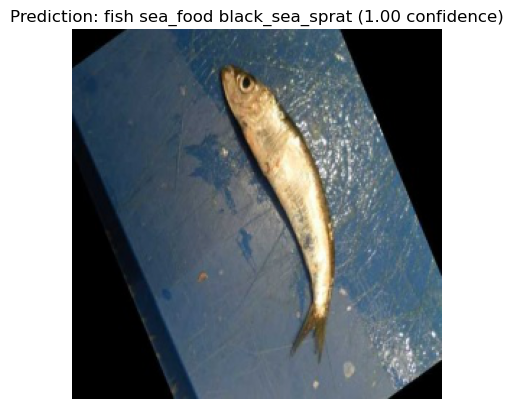

In [4]:
import glob, random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from src.predict_utils import load_model, predict_image

# 1. Load model (mobilenetv2 trained with 224x224)
model = load_model("models/mobilenetv2_best.h5")

# 2. Get class indices (make sure size = 224x224 to match model)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_gen = datagen.flow_from_directory("data/fish", target_size=(224,224), subset="validation")
class_indices = val_gen.class_indices

# 3. Pick a random test image
img_path = random.choice(glob.glob("data/fish/*/*"))
print("Testing with image:", img_path)

# 4. Predict (use 224x224 here)
pred_class, conf = predict_image(model, img_path, (224,224), class_indices)

# 5. Show result
img = plt.imread(img_path)
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {pred_class} ({conf:.2f} confidence)")
plt.show()


Found 1459 images belonging to 11 classes.


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 885ms/step

 Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.97      1.00      0.99       256
                animal fish bass       1.00      0.25      0.40         8
   fish sea_food black_sea_sprat       0.98      1.00      0.99       134
   fish sea_food gilt_head_bream       0.98      0.99      0.99       132
   fish sea_food hourse_mackerel       1.00      0.98      0.99       134
        fish sea_food red_mullet       0.99      0.99      0.99       133
     fish sea_food red_sea_bream       1.00      0.99      0.99       136
          fish sea_food sea_bass       0.98      0.99      0.98       127
            fish sea_food shrimp       1.00      0.95      0.97       135
fish sea_food striped_red_mullet       0.94      0.98      0.96       129
             fish sea_food trout       1.00      0.99      1.00       135

                        accuracy           

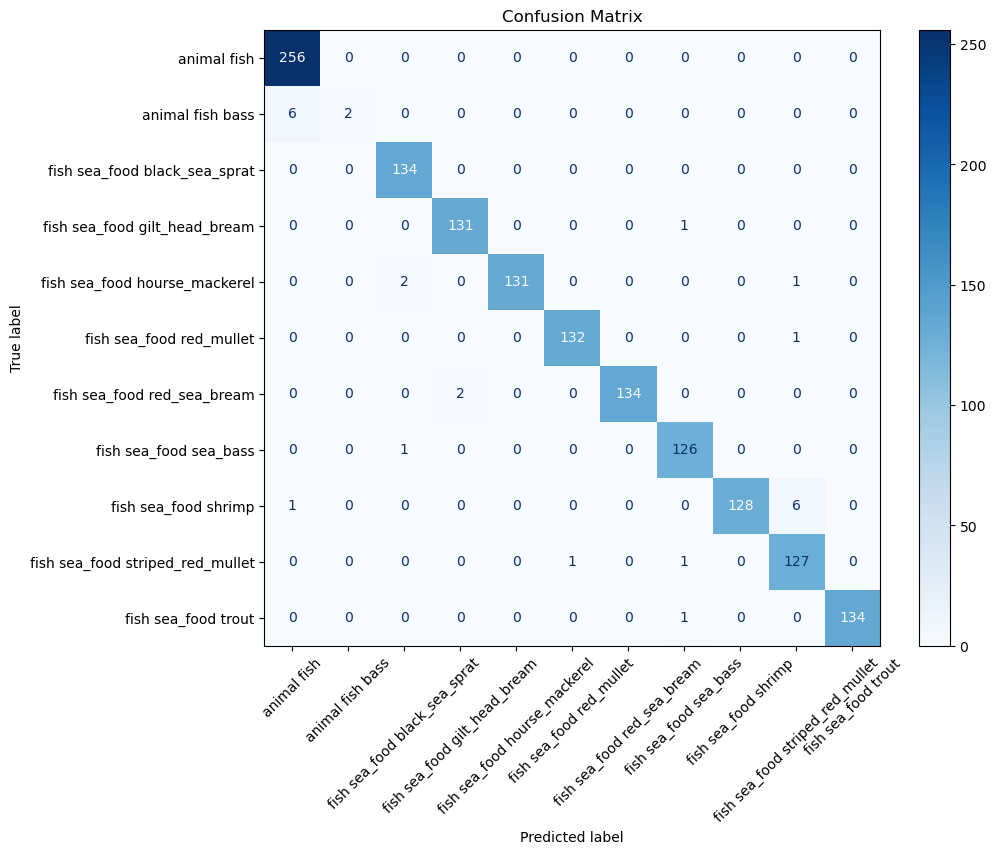

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from src.predict_utils import load_model

# 1. Load the trained model
model = load_model("models/mobilenetv2_best.h5")

# 2. Load validation data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen = datagen.flow_from_directory(
    "data/fish",
    target_size=(224,224),   # use same size as training
    batch_size=32,
    subset="validation",
    shuffle=False  # important to match order of predictions
)

# 3. Get predictions
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

# 4. Classification report
class_labels = list(val_gen.class_indices.keys())
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# 5. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 6. Plot training history (if saved during training)
import pickle, os
if os.path.exists("history.pkl"):
    with open("history.pkl", "rb") as f:
        history = pickle.load(f)

    # Accuracy
    plt.plot(history['accuracy'], label='Train Acc')
    plt.plot(history['val_accuracy'], label='Val Acc')
    plt.legend()
    plt.title("Accuracy over Epochs")
    plt.show()

    # Loss
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title("Loss over Epochs")
    plt.show()
